# Aimlytics


Import libraries


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Image Acquisition and Pre-processing
We want to obtain a clear image, ready to be analyzed.

(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

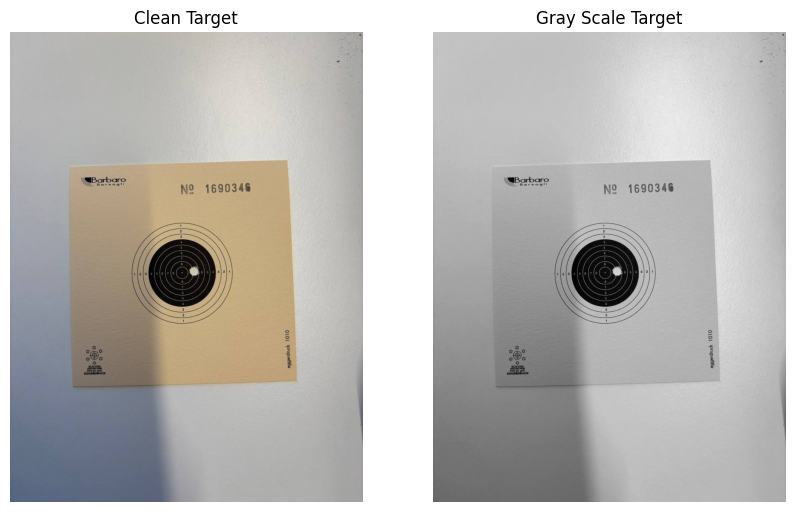

In [18]:
image = cv2.imread("target_images/photo_2025-02-27_14-20-40.jpg")
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.show()
plt.subplot(121)
plt.title("Clean Target")
plt.imshow(RGB_image)
plt.axis('off')
plt.subplot(122)
plt.title("Gray Scale Target")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')


- Filter noise with (Gaussian+median blur?? oppure Bilateral che preserva contorni??)
- Smooth out the image to remove noise



(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

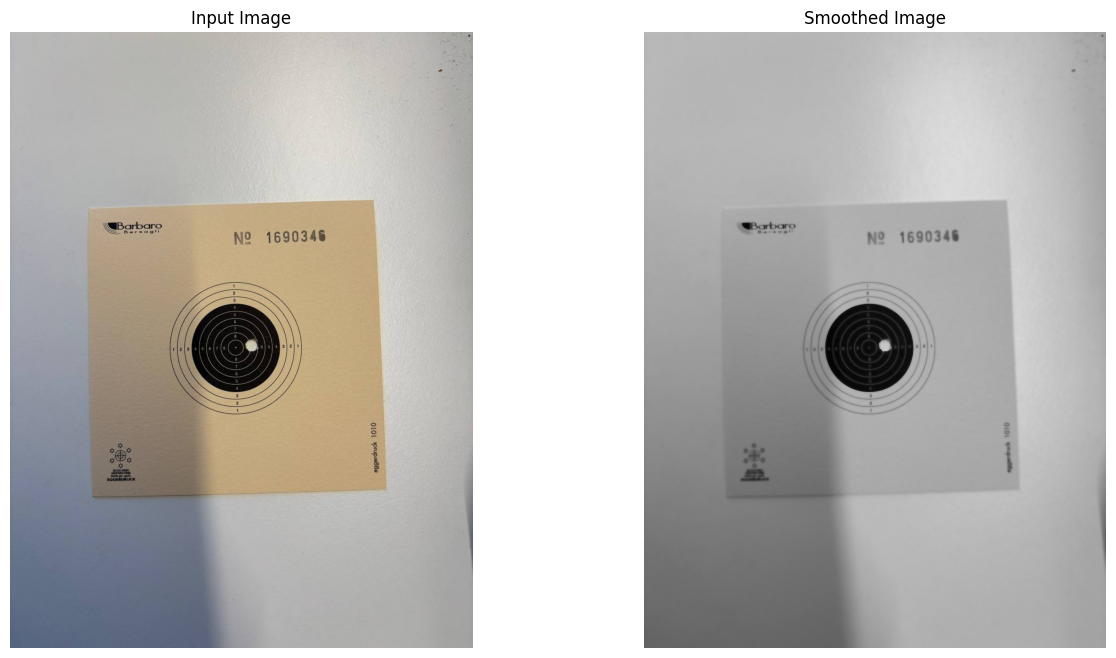

In [19]:
# pts1 = np.float32([[219,209],[612,8],[380,493],[785,271]])
# # Size of the Transformed Image
# pts2 = np.float32([[0,0],[500,0],[0,400],[500,400]])
#
# perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
# corrected_perspective_image = cv2.warpPerspective(image, perspective_matrix, image.shape[1::-1])

#smoothed_image_gauss = cv2.GaussianBlur(image,(5,5),0)
#no_noise_image = cv2.medianBlur(smoothed_image_gauss,5)
#d=9 (diametro pixel da considerare)
#sigmaColor=75 (quanto considerare le differenze di colore)
#sigmaSpace=75 (quanto lontano spazialmente considerare i pixel vicini)
smoothed_image_bi = cv2.bilateralFilter(gray_image, 9, 75, 75)

plt.figure(figsize=(15, 8))
# plt.title("Corrected Perspective")
# plt.imshow(cv2.cvtColor(no_noise_image,cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.subplot(121)
plt.title("Input Image")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.title("Smoothed Image")
plt.imshow(cv2.cvtColor(smoothed_image_bi,cv2.COLOR_BGR2RGB))
plt.axis('off')

## Target Recognition

Canny edges + Bounding boxes

In [36]:
# codice da lab prof:
edgeresult = np.copy(smoothed_image_bi) #creating an image copy to draw lines on
edgeresult = cv2.cvtColor(edgeresult, cv2.COLOR_GRAY2BGR)
th1=50
th2=150 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
edges = cv2.Canny(edgeresult, th1, th2)

edgeresult[edges != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

# Define the Hough transform parameters

#circles_image = cv2.cvtColor(np.copy(smoothed_image_bi), cv2.COLOR_GRAY2BGR)
# Run Hough on the edge-detected image
#cv2.HoughCircles(image, circles, method, dp, minDist, param1 = 100, param2 = 100, minRadius = 0, maxRadius = 0)
#circles = cv2.HoughCircles(image=edges, method=cv2.HOUGH_GRADIENT, dp=1.2, minDist=500, param1=50, param2=30, maxRadius=350)
# Iterate over the output circles to draw them on the image copy
# if circles is not None:
#     # convert the (x, y) coordinates and radius of the circles to integers
#     circles = np.round(circles[0, :]).astype("int")
#     # loop over the (x, y) coordinates and radius of the circles
#     for (x, y, r) in circles:
#         # draw the circle in the output image, then draw a rectangle
#         # corresponding to the center of the circle
#         cv2.circle(circles_image, (x, y), r, (0, 255, 0), 4)
#         cv2.rectangle(circles_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

contours_poly = [None]*len(edges)
boundRect = [None]*len(edges)
centers = [None]*len(edges)
radius = [None]*len(edges)
for i, c in enumerate(edges):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

drawing = np.zeros((edgeresult.shape[0], edgeresult.shape[1], 3), dtype=np.uint8)
# for i in range(len(edges)):
#     color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#     cv.drawContours(drawing, contours_poly, i, color)
#     cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
#       (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
#     cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title("Canny Edges")
plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
#plt.title("Target Edges")
#plt.imshow(circles_image)
plt.title("Poly Target Edges")
plt.imshow(cv2.cvtColor(drawing,cv2.COLOR_BGR2RGB))
plt.axis('off')

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/approx.cpp:690: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32S || depth == CV_32F) in function 'approxPolyDP'


## Transform Perspective
- Correct perspective with warpPerspective() (DINAMICAMENTE solo dopo rilevamento cerchio bersaglio)

In [21]:
#inserisci funz per rilevare e traformare bersagli con foto storta

## Detect bullet holes
Hough tranform with different parameters

# Assign score